In [1]:
import f3dasm
from typing import List
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy

2022-11-21 13:09:05.175890: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-21 13:09:05.261012: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
from cycler import cycler
cc = (cycler(color=list('bgrcmyk')) *
      cycler(linestyle=['-', '--', 'dotted']))

In [3]:
i=4

In [4]:
files = (os.listdir('./obj'))
files = [file[:-4] for file in files]

In [5]:
print(files[i])

Schwefel2_20_seed36849_dim4


In [6]:
results = [f3dasm.read_pickle('./obj/'+files[i]) for i in range(len(files))]

In [7]:
def plot_results(results, ax):
    mean_y, std_y = f3dasm.calculate_mean_std(results.data)

    ax.plot(mean_y, label=f"optimizer={results.optimizer}")

    #ax.fill_between(np.arange(len(mean_y)), mean_y-1.96*std_y, mean_y+1.96*std_y, alpha=.1)

    return ax

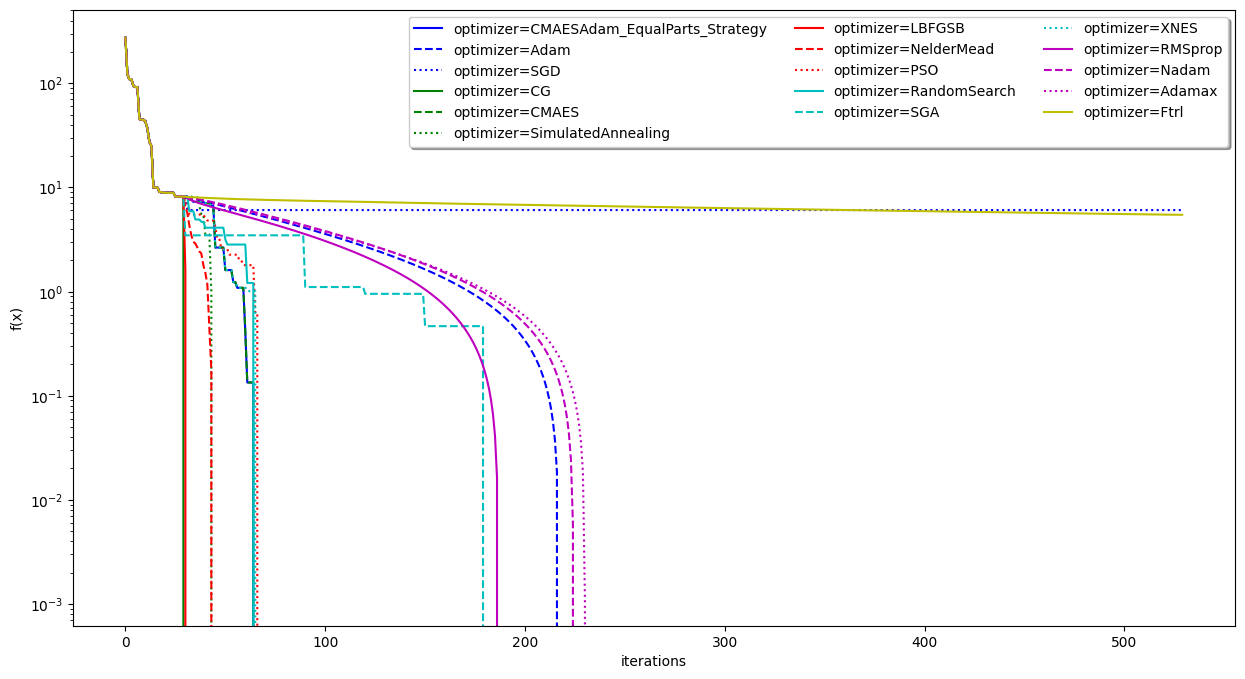

In [8]:
fig, ax = plt.figure(figsize=(15,8)), plt.axes()

ax.set_xlabel('iterations')
ax.set_ylabel('f(x)')
ax.set_yscale('log')
ax.set_prop_cycle(cc)

for index, res in enumerate(results[1]):
    ax = plot_results(res, ax)

leg = ax.legend(loc='upper right', ncol=3, fancybox=True, shadow=True) #bbox_to_anchor=(0.5, 1.05)

# fig.savefig(files[i]+'.png', dpi=300)

In [9]:
from sklearn import preprocessing

def margin_of_victory(results):
    # Create df with all results
    df = pd.concat([f3dasm.calculate_mean_std(results[i].data)[0] for i in range(len(results))],axis=1)

    # Change columnnames
    optimizer_names = [results[i].optimizer for i in range(len(results))]
    df.columns = optimizer_names

    #Normalize
    min_max_scaler = preprocessing.MinMaxScaler()

    df_numpy = df.values #returns a numpy array
    # Reshape to 1D array
    df_numpy_reshaped = df_numpy.reshape([-1,1])

    x_scaled = min_max_scaler.fit_transform(df_numpy_reshaped)

    # Transform back
    x_scaled = x_scaled.reshape(df_numpy.shape)
    df = pd.DataFrame(x_scaled)
    df.columns = optimizer_names

    # Calculate margin of victory
    tt = []
    for name in optimizer_names:
        df_dropped = df.drop(name, axis=1)


        tt.append(df_dropped.min(axis=1) - df[name])

    # Create df with all MoV
    df_margin_of_victory = pd.concat(tt,axis=1)

    # Change columnnames
    df_margin_of_victory.columns = optimizer_names

    return df_margin_of_victory

In [10]:
df_margin_of_victory_1 = margin_of_victory(results[0])
df_margin_of_victory_2 = margin_of_victory(results[1])


for index,r in enumerate(results):
    df_mov = margin_of_victory(r)
    if index == 0:
        res = copy.copy(df_mov)
        continue
    res = res + df_mov
    
res = res / len(results)

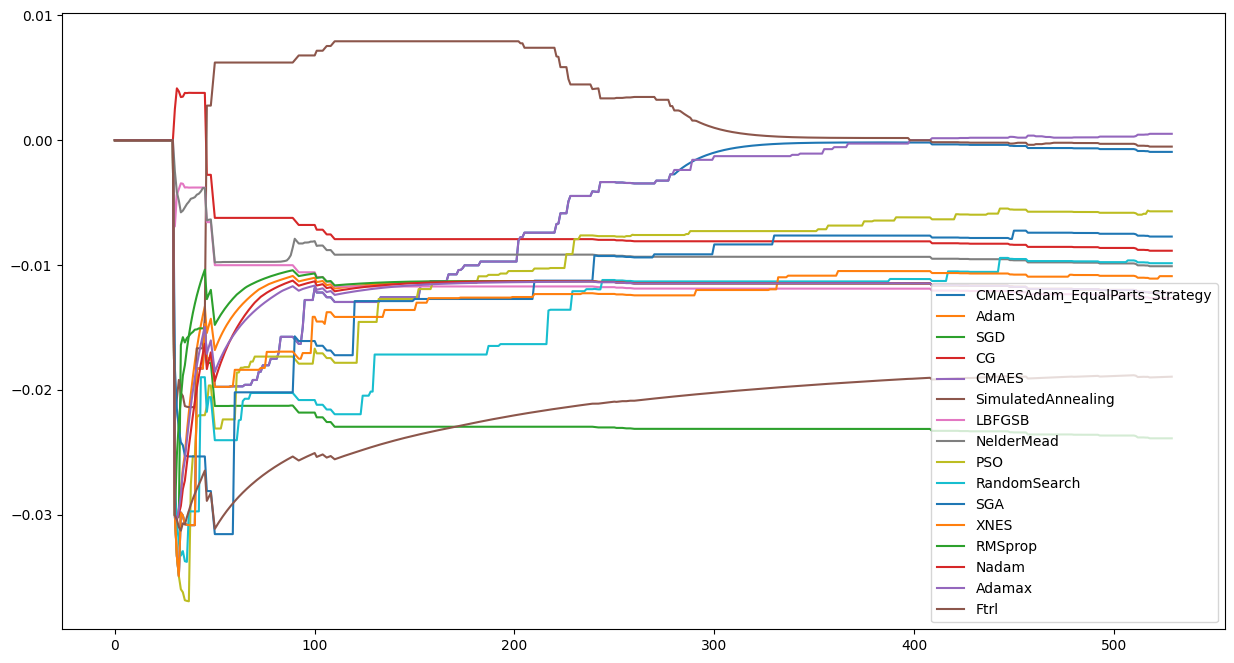

In [11]:
fig,ax = plt.figure(figsize=(15,8)), plt.axes()
ax.plot(df_margin_of_victory_1, label=df_margin_of_victory_1.columns)
ax.legend()

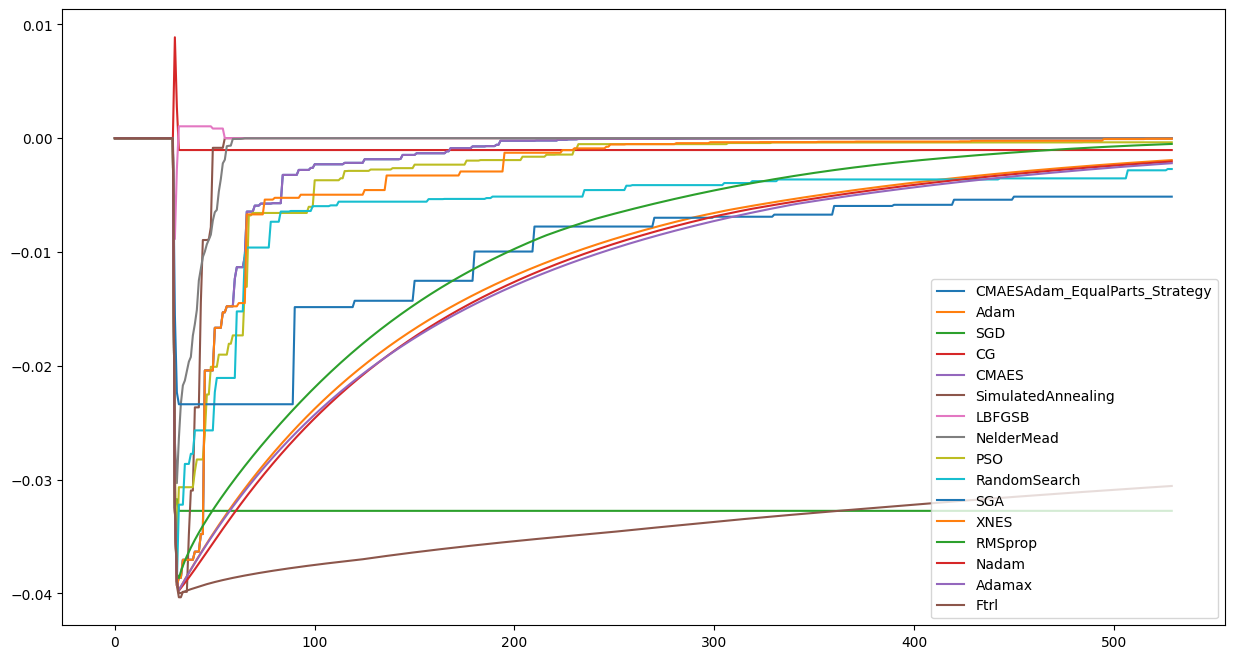

In [12]:
fig,ax = plt.figure(figsize=(15,8)), plt.axes()
ax.plot(df_margin_of_victory_2, label=df_margin_of_victory_2.columns)
ax.legend()

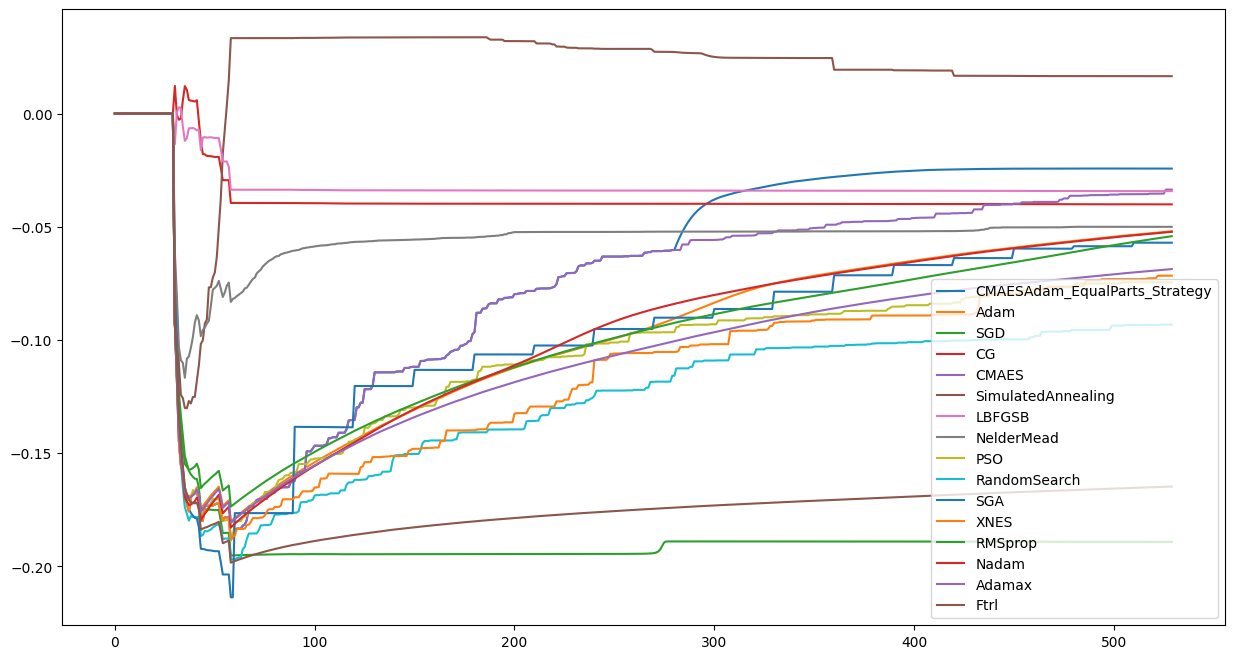

In [13]:
fig,ax = plt.figure(figsize=(15,8)), plt.axes()
ax.plot(res, label=df_margin_of_victory_1.columns)
ax.legend()